# Registration of Hyspex to co-registered NAIP 2019 and 2021

### Import Packages

In [61]:
# Import packages

from pathlib import Path
from arosics import COREG, COREG_LOCAL, DESHIFTER
from geoarray import GeoArray
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os

### Path Setup

In [62]:
# Set the working directory

wd = Path('/media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022')
assert wd.exists()

### Load the Reference Image (test)

Note: array has been downsampled to 1000 x 699 for faster visualization.


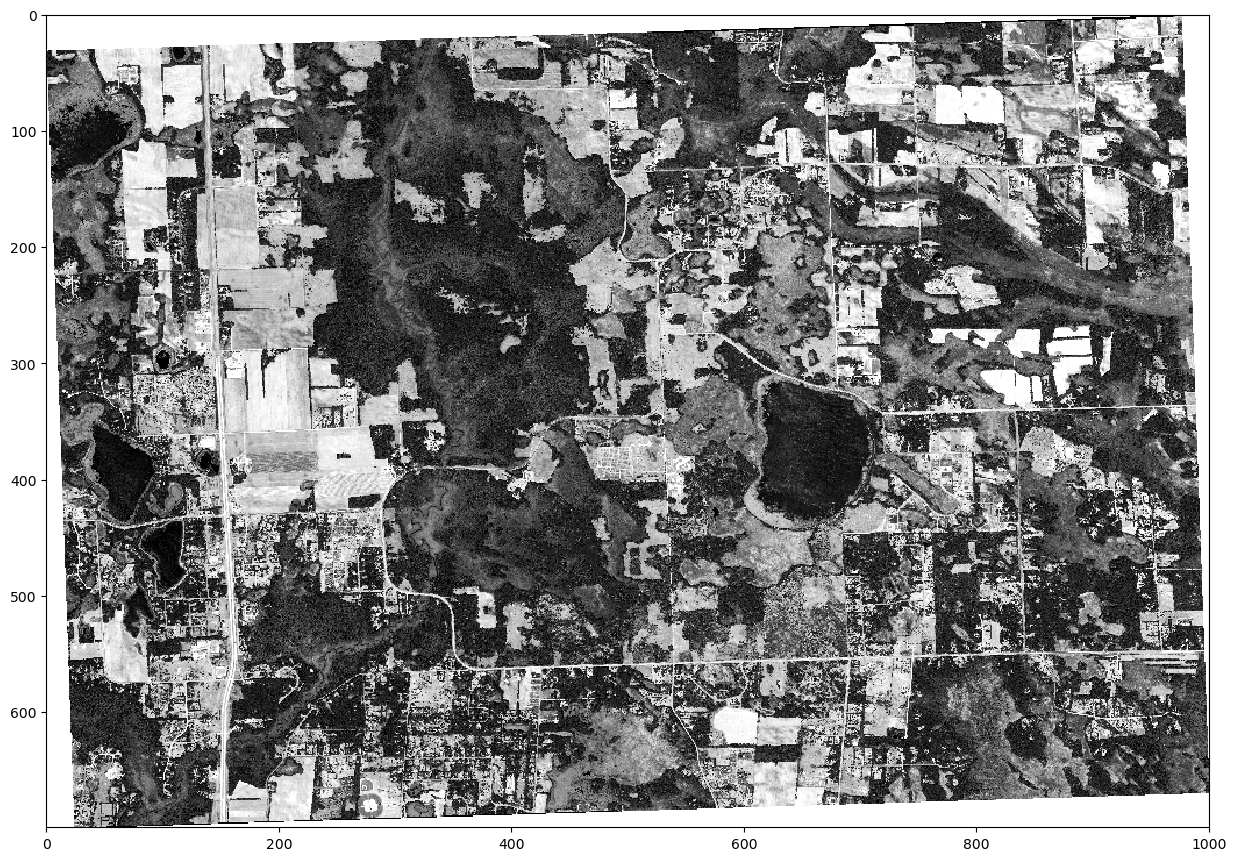

In [63]:
# Select and read title of intest from NAIP

basemap_file = wd/'NAIP_coregister.tif' #This is the NAIP scene of 2019 for the title of interest
reference = GeoArray(str(basemap_file))

# Plot raster
reference.show(figsize = (15, 15))

### Load Target Infomration

In [65]:
# Select the forlder for processing in a batch.
in_wd = wd/'projected'

# Select output path
out_wd = wd/'coregistered'

# List images to transform 
files = os.listdir(in_wd)
files

['Cedar_08.tif',
 'Cedar_011.tif',
 'Cedar_05.tif',
 'Cedar_07.tif',
 'Cedar_012.tif',
 'Cedar_04.tif',
 'Cedar_01.tif',
 'Cedar_02.tif',
 'Cedar_03.tif',
 'Cedar_013.tif',
 'Cedar_014.tif',
 'Cedar_09.tif',
 'Cedar_06.tif',
 'Cedar_010.tif']

### Coregistration to a Basemap Image

In [66]:
# Setup parameters for tiepoint detection and affine transformation factor calculation
coreg_kwargs = {
    'grid_res': 15, # Tie point spacing in x-direction, in terms of target image pixels
    'window_size': (200, 200), # Size of matching window
    'nodata': (0.0, -9999), # No-data values for reference & target images
    'max_iter': 50,
    'r_b4match': 1, # Reference band for matching
    's_b4match': 3, # Target band for matching
    'CPUs': 30,      # For Ubuntu only
    'max_shift': 200,
    'min_reliability': 30
}


In [67]:
# Apply correctiton in batch

for file in files:
    int_file = in_wd/file
    out_file = out_wd/file
      
    #Read
    scene = GeoArray(str(int_file))
    
    # Apply local image coregistration
    CRL = COREG_LOCAL(reference, scene, **coreg_kwargs)
    
    with np.errstate(over = 'ignore', divide = 'ignore', invalid = 'ignore'): # Ignore AROSICS complaining
        result = CRL.correct_shifts()
    
    # Apply shifts
    deshifter = DESHIFTER(scene, CRL.coreg_info)

    # Warp the full-band image "with the nearest resampling"
    target_shifted_all_bands = deshifter.correct_shifts()

    # Get shifted GeoArray
    target_geoarray_shifted_all_bands = target_shifted_all_bands['GeoArray_shifted']

    # Save the shifted image into ENVI *.hdr format with metada
    target_geoarray_shifted_all_bands.save(str(out_file), fmt = 'GTiff')

Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220016.37171720972, 711302.0887808028, 220289.09424425598, 712747.3980320656)
Matching window position (X,Y): 220158.66447176842/712011.7385627668
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (123, 124).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5780 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:42


Found 2098 matches.
Performing validity checks...
961 tie points flagged by level 1 filtering (reliability).
222 tie points flagged by level 2 filtering (SSIM).
88 tie points flagged by level 3 filtering (RANSAC)


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_08 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.40047360799744947/0.40047360799744947; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |--------------------------------------------------| 0.0% Complete  => 0:00:00

1039 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |============================----------------------| 56.0% Complete  => 0:00:00

Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (3621, 694, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_08.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220034.74929945075, 711296.4091707923, 220268.62573893202, 712689.655973798)
Matching window position (X,Y): 220138.53472253276/712006.3634860966
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (5533 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:21


Found 2442 matches.
Performing validity checks...
1017 tie points flagged by level 1 filtering (reliability).
201 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_011 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.40047335527614103/0.40047335527614103; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00


175 tie points flagged by level 3 filtering (RANSAC)
1248 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (3487, 647, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_011.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220333.23762567242, 711323.4513745739, 220665.2300494242, 712629.7955075995)
Matching window position (X,Y): 220492.2867982168/711955.0888848505
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (188, 188).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5098 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:09


Found 2007 matches.
Performing validity checks...
1101 tie points flagged by level 1 filtering (reliability).
169 tie points flagged by level 2 filtering (SSIM).
104 tie points flagged by level 3 filtering (RANSAC)
801 valid tie points remain after filtering.


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_05 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.40047337002624306/0.40047337002624306; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (3285, 840, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_05.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220256.07844296613, 711383.634635183, 220507.17557943342, 712756.8596446669)
Matching window position (X,Y): 220376.32877090882/712066.0724915861
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (169, 169).
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (5229 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:10
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_07 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004739018617304/0.4004739018617304; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00


Found 1835 matches.
Performing validity checks...
884 tie points flagged by level 1 filtering (reliability).
175 tie points flagged by level 2 filtering (SSIM).
114 tie points flagged by level 3 filtering (RANSAC)
836 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3440, 674, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_07.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220662.07561260642, 711097.018961517, 220885.5388436479, 712455.4191043355)
Matching window position (X,Y): 220788.81756208718/711784.7965727309
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (136, 136).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5209 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:12


Found 1813 matches.
Performing validity checks...
885 tie points flagged by level 1 filtering (reliability).
199 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_012 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004717402176834/0.4004717402176834; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |====================------------------------------| 41.0% Complete  => 0:00:00

111 tie points flagged by level 3 filtering (RANSAC)
817 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3399, 753, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_012.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220455.80025791004, 711296.7091472972, 220725.71920641142, 712632.2873271964)
Matching window position (X,Y): 220605.26208490334/711960.7669211132
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (78, 78).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5333 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:27


Found 1717 matches.
Performing validity checks...
984 tie points flagged by level 1 filtering (reliability).
220 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_04 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004732173610884/0.4004732173610884; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 99.0% Complete  => 0:00:00

90 tie points flagged by level 3 filtering (RANSAC)
639 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3347, 803, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_04.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220762.9185228617, 710497.2313182317, 221095.3081838791, 712481.9580170297)
Matching window position (X,Y): 220935.99133396667/711491.5563546963
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (166, 165).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (7715 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:05:03


Found 2195 matches.
Performing validity checks...
1381 tie points flagged by level 1 filtering (reliability).
338 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_01 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.40046947110532716/0.40046947110532716; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |--------------------------------------------------| 0.0% Complete  => 0:00:00

74 tie points flagged by level 3 filtering (RANSAC)
736 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 99.0% Complete  => 0:00:00

Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (4972, 845, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_01.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220686.48212927594, 711118.6008004785, 220948.39067386833, 712454.9751327488)
Matching window position (X,Y): 220830.86567735506/711791.7855533353
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (175, 175).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5021 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:08


Found 1501 matches.
Performing validity checks...
1019 tie points flagged by level 1 filtering (reliability).
276 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_02 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004717807223075/0.4004717807223075; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


60 tie points flagged by level 3 filtering (RANSAC)
421 valid tie points remain after filtering.
Correcting geometric shifts...
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (3346, 703, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_02.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220548.80600878134, 711084.7835755049, 220842.3517122371, 712425.963058279)
Matching window position (X,Y): 220713.9312116421/711766.9066027087
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (190, 189).
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5420 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:23


Found 1932 matches.
Performing validity checks...
1190 tie points flagged by level 1 filtering (reliability).
233 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_03 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.40047162817978144/0.40047162817978144; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |===============================================---| 93.1% Complete  => 0:00:00

79 tie points flagged by level 3 filtering (RANSAC)
660 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3363, 764, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_03.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/CoReg.py:131: UserWarning: The footprint of the image to be shifted contains multiple separate image parts. AROSICS will only process the largest image part.
  warnings.warn('The footprint of the %s contains multiple separate image parts. '


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220458.94705827584, 711378.2607349331, 220696.42786568403, 712681.802097688)
Matching window position (X,Y): 220582.32458441358/712024.6372172758
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5554 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:24
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_013 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.40047353694467047/0.40047353694467047; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |--------------------------------------------------| 0.0% Complete  => 0:00:00

Found 2057 matches.
Performing validity checks...
978 tie points flagged by level 1 filtering (reliability).
180 tie points flagged by level 2 filtering (SSIM).
113 tie points flagged by level 3 filtering (RANSAC)
965 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3260, 609, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_013.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220126.74841914873, 711702.9923779675, 220343.40539331318, 712706.1822490986)
Matching window position (X,Y): 220239.29487215646/712203.308949697
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (3864 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:02:15
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_014 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.400474998455524/0.400474998455524; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00


Found 1720 matches.
Performing validity checks...
798 tie points flagged by level 1 filtering (reliability).
163 tie points flagged by level 2 filtering (SSIM).
112 tie points flagged by level 3 filtering (RANSAC)
810 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (2513, 569, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_014.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(219913.8130477846, 711410.5910350025, 220129.2682074176, 712831.8742348863)
Matching window position (X,Y): 220016.27605733374/712115.2428928781
Initializing tie points grid...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Equalizing pixel grids and projections of reference and target image...
Calculating tie point grid (5755 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:25


Found 2085 matches.
Performing validity checks...
1046 tie points flagged by level 1 filtering (reliability).
239 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_09 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004742744107658/0.4004742744107658; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |--------------------------------------------------| 0.0% Complete  => 0:00:00

106 tie points flagged by level 3 filtering (RANSAC)
924 valid tie points remain after filtering.
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3552, 602, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_09.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(220127.6402148292, 711969.9867522767, 220359.51579471037, 712559.487362959)
Matching window position (X,Y): 220236.205488921/712272.7596425351
Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (156, 156).
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (2364 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:01:20


Found 1229 matches.
Performing validity checks...
569 tie points flagged by level 1 filtering (reliability).
110 tie points flagged by level 2 filtering (SSIM).


/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_06 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004759583439626/0.4004759583439626; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Translating progress |==================================================| 100.0% Complete  => 0:00:00


64 tie points flagged by level 3 filtering (RANSAC)
588 valid tie points remain after filtering.
Correcting geometric shifts...
Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Writing GeoArray of size (1482, 606, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_06.tif.
Calculating footprint polygon and actual data corner coordinates for reference image...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01
Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(214990.5145, 708605.8786804284, 225649.05459994433, 716578.2729)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Bounding box of calculated footprint for image to be shifted:
	(219829.01030692575, 711588.4979787583, 220054.4776986854, 712802.7379997445)
Matching window position (X,Y): 219929.3677727008/712185.1784845033


Warping progress     |=============-------------------------------------| 25.0% Complete  => 0:00:00

Target window size (200, 200) not possible due to too small overlap area or window position too close to an image edge. New matching window size: (160, 159).
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating tie point grid (4875 points) using 30 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:03:01
/home/antonio/anaconda3/envs/arosics/lib/python3.11/site-packages/arosics/DeShifter.py:291: UserWarning: 
The coordinate grid of Cedar_010 cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 0.4004749409585199/0.4004749409585199; desired [X/Y]: 0.5804040568473283/0.6203743309015408). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  warnings.warn("\nThe coordinate grid of %s cannot be aligned to the desired grid because their pixel "
Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Found 1166 matches.
Performing validity checks...
780 tie points flagged by level 1 filtering (reliability).
184 tie points flagged by level 2 filtering (SSIM).
39 tie points flagged by level 3 filtering (RANSAC)
347 valid tie points remain after filtering.
Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:00


Correcting geometric shifts...
Writing GeoArray of size (3039, 623, 3) to /media/antonio/Work/Projects/Oak-wilt_mapping/Training/2022/coregistered/Cedar_010.tif.
